### **1**.  Write a python code to implement decision tree for below given dataset. Identify the root node and all subpart or children of node and draw the tree.

In [11]:
#imprting Library
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import collections

In [12]:
#Reading CSV
Datafram = pd.read_csv('data.csv')
Datafram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Itemno        14 non-null     int64 
 1   Age           14 non-null     object
 2   Income        14 non-null     object
 3   Student       14 non-null     object
 4   CreditRating  14 non-null     object
 5   BuysComputer  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [13]:
Datafram.head()

,Itemno,Age,Income,Student,CreditRating,BuysComputer
0,1,Youth,High,No,Fair,No
1,2,Youth,High,No,Excellent,No
2,3,Middle,High,No,Fair,Yes
3,4,Senior,Medium,No,Fair,Yes
4,5,Senior,Low,Yes,Fair,Yes


In [14]:
#converting string to number for process
Datafram.BuysComputer.replace(('Yes', 'No'), (1,0), inplace=True)
Datafram.Student.replace(('Yes', 'No'), (1,0), inplace=True)
Datafram.Age.replace(('Youth', 'Middle','Senior'), (1,2,3), inplace=True)
Datafram.Income.replace(('High', 'Medium','Low'), (1,2,3), inplace=True)
Datafram.CreditRating.replace(('Fair', 'Excellent'), (0,1), inplace=True)
Datafram.head()

,Itemno,Age,Income,Student,CreditRating,BuysComputer
0,1,1,1,0,0,0
1,2,1,1,0,1,0
2,3,2,1,0,0,1
3,4,3,2,0,0,1
4,5,3,3,1,0,1


In [15]:
feature_cols=['Income','Age','Student','CreditRating']
x= Datafram[feature_cols]
y = Datafram[['BuysComputer']]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 1, random_state=0)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = dt.predict(X_train)
print(y_pred)

[1 1 1 1 0 1 0 0 1 1 0 0 1]


In [18]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

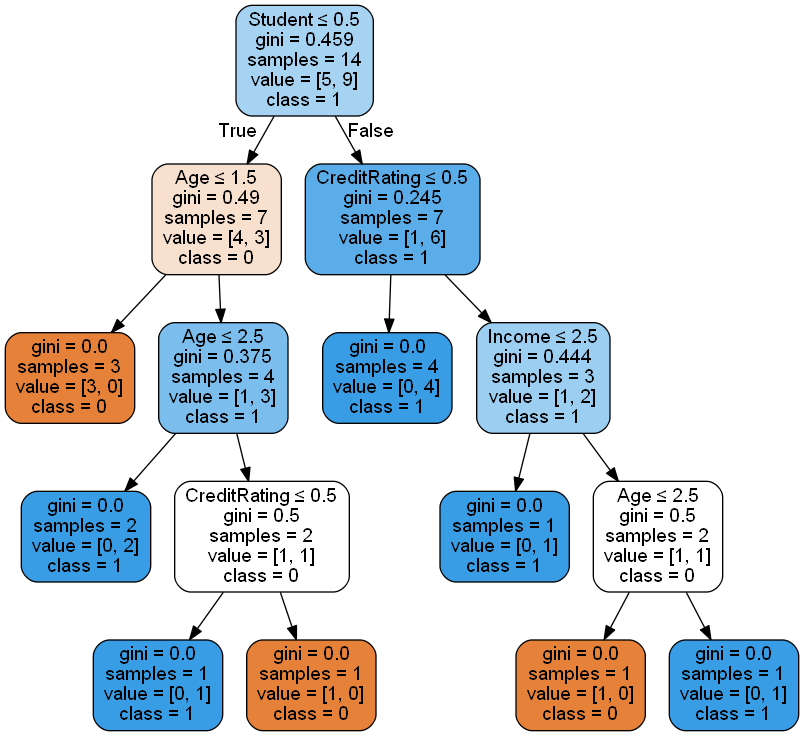

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())